# Introduction to Data Science Project 2020/21-1

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_columns', None)
dataFrame = pd.read_csv('project_data.csv', sep=";")
dataFrame2 = pd.read_csv('project_data.csv', sep=";")
#dataFrame

In [3]:
# 1) Develop a prediction model to classify the customers as good or bad

# Reading in the Data set
pd.set_option('display.max_columns', None)
dataFrame = pd.read_csv("project_data.csv", 1, ";")
# Analyzing input
dataFrame.describe()

,X02,X05,X08,X11,X13,X16,X18,Y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [4]:
# scaler = StandardScaler()
# scaler.fit(df.drop('Y',axis=1))
# scaled_features = scaler.transform(df.drop('Y',axis=1))
# df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

#isolating the target column from the dataset
target = dataFrame["Y"]
features = dataFrame.drop("Y", axis='columns')
features

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [5]:
# Counts the target Good and Bad customers
count_target = dataFrame.values[:,-1]
counter = Counter(count_target)
for group, count in counter.items():
	percentage = count / len(count_target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (group, count, percentage))
print('\n')

Class=1, Count=700, Percentage=70.000%
Class=2, Count=300, Percentage=30.000%




In [6]:
# categorizing data into two groups: The numerical data, and categorical data. With this two set we can make different operations
numerical_attributes = ["X02", "X08", "X11", "X13", "X16", "X18", "X05"]
categorical_attributes = ["X01", "X03", "X04", "X06", "X07", "X09", "X10", "X12", "X14", "X15", "X17", "X19", "X20"]

numerical_data = features[numerical_attributes]
categorical_data = features.drop(numerical_attributes, axis=1)
categorical_data

,X01,X03,X04,X06,X07,X09,X10,X12,X14,X15,X17,X19,X20
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,A32,A42,A61,A74,A92,A101,A121,A143,A152,A172,A191,A201
996,A11,A32,A41,A61,A73,A91,A101,A122,A143,A152,A174,A192,A201
997,A14,A32,A43,A61,A75,A93,A101,A123,A143,A152,A173,A191,A201
998,A11,A32,A43,A61,A73,A93,A101,A124,A143,A153,A173,A192,A201


In [9]:
#sns.pairplot(dataFrame2, hue='Y', palette="coolwarm")

In [8]:
dataFrame["Y"].replace({1 : 0, 2 : 1}, inplace=True)

In [9]:
# Print the scores of the training
def printScores(name, model, X_train, X_test, y_train, y_test):
    print("================ ", name," ================")
    print("\nTrained score: ", model.score(X_train, y_train))
    print("Test score: ", model.score(X_test, y_test))

# Print the Reports of the prediciton
def printReport(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    # print("\nConfusion Matrix:")
    # print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("========================================================")


In [14]:
# Assembling pipeline for numerical data
# Creating a MinMaxScaler
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('min_max', MinMaxScaler())
])

# Assembling pipeline to feed the data
# Creating an ordinal encoder instance and using it to encode the categorical data. What this means is that for each different category it introduces an integer number and replaces it.
full_pipeline = ColumnTransformer([
    ("num", numerical_pipeline, numerical_attributes),
    ("cat", OrdinalEncoder(), categorical_attributes),
])

# preparing pipeline
transformed = full_pipeline.fit_transform(features)

# Training data
X_train, X_test, y_train, y_test = train_test_split(transformed, target, test_size=0.3)

# from sklearn.model_selection import cross_val_score

# print("=============================== Running Models ===============================")
# # KNN - K Nearest Neighbors
# name_KNN = "K Nearest Neighbors"
# knn = KNeighborsClassifier(n_neighbors=50, leaf_size=300)
# knn.fit(X_train, y_train)
# printScores(name_KNN, knn, X_train, X_test, y_train, y_test)
# printReport(name_KNN, knn, X_test, y_test)

# # SVM - Support Vector Model
# name_SVM = "Support Vector Model"
# svc = SVC(C=50, gamma=10, kernel='linear')
# svc.fit(X_train, y_train)
# y_pred = svc.predict(X_test)
# printScores(name_SVM, svc, X_train, X_test, y_train, y_test)
# printReport(name_SVM, svc, X_test, y_test)
# # scores = cross_val_score(svc, X_train, y_train, cv=5)
# # print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# # scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_macro')
# # print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# from sklearn.model_selection import ShuffleSplit
# n_samples = X_train.shape[0]
# cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
# scores = cross_val_score(svc, X_train, y_train, cv=cv)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# # LR - Logistic Regression
# name_LR = "Logistic Regression"
# lr = LogisticRegression(solver='liblinear')
# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# printScores(name_LR, lr, X_train, X_test, y_train, y_test)
# printReport(name_LR, lr, X_test, y_test)

# # GPC - Gaussian Process Classifier
# name_GPC = "Gaussian Process Classifier"
# gpc = GaussianNB()
# gpc.fit(X_train, y_train)
# y_pred = gpc.predict(X_test)
# printScores(name_GPC, gpc, X_train, X_test, y_train, y_test)
# printReport(name_GPC, gpc, X_test, y_test) 


In [12]:
print("=============================== Running SVC Variations ===============================")
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernel
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernel
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernel
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernel
        return SVC(kernel='linear', gamma="auto")

for i in range(4):
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print("Evaluation: ", kernels[i], " kernel")
    print(classification_report(y_test,y_pred))


#If we take a even closer look we can use GridSearchCV to optimize and check for different parameters with different kernels.
#grid_params =  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_params =  {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(), grid_params, verbose=1)
grid.fit(X_train,y_train)

print("Best parameters set found on development set:")
print(grid.best_params_)

print("Detailed classification report:\n")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, grid.predict(X_test)
print(classification_report(y_true, y_pred))

print("\nTrained score: ", grid.score(X_train, y_train))
print("Test score: ", grid.score(X_test, y_test))

scores = cross_val_score(svc, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(svc, X_train, y_train, cv=ShuffleSplit(n_splits=5, test_size=0.3, random_state=0))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
	
scoring = ['precision_macro', 'recall_macro']
svc = SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(svc, X_train, y_train, scoring=scoring)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))

from sklearn.metrics import make_scorer
scoring = {'prec_macro': 'precision_macro', 'rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(svc, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)

# # calculate f2 score
# def f2(y_true, y_pred):
# 	return fbeta_score(y_true, y_pred, beta=2)

# metric = make_scorer(f2)
# scores = cross_val_score(svc, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1)
# print(scores)

# print(np.mean(scores['train_rec_macro']))

=============================== Running SVC Variations ===============================


ValueError: The number of classes has to be greater than one; got 1 class

=============================== Running Elbow Method ===============================


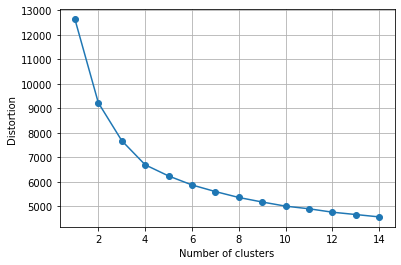

In [16]:
from sklearn.cluster import KMeans
import seaborn as sns

print("=============================== Running Elbow Method ===============================")
# Elbow method to determine the recommended amount of clusters
# Calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
    km.fit(X_train)
    distortions.append(km.inertia_)
# plot
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid(axis="both")
plt.show()

[Text(0, 0.5, 'Money in the bank'),
 Text(0.5, 0, 'Category of the customer based on their money in the bank')]

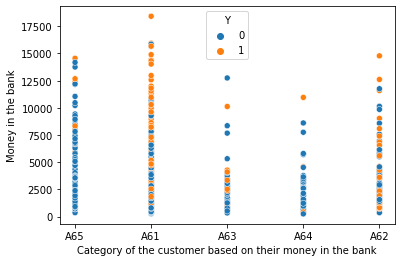

In [18]:
ax = sns.scatterplot(data = dataFrame, x="X06", y="X05", sizes=(20,6), palette="tab10", hue=target)
ax.set(ylabel='Money in the bank', xlabel='Category of the customer based on their money in the bank')
#nagyobb eséllyel lesz valaki rossz ügyfélnek ítélve ha kevés tartaléka van

[Text(0.5, 0, 'Money in the bank'),
 Text(0, 0.5, 'Duration of the requested loan')]

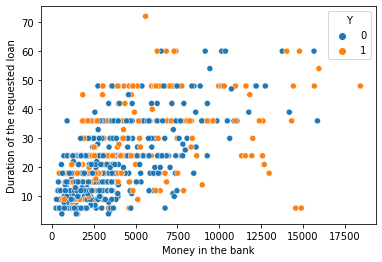

In [19]:
ax = sns.scatterplot(data = dataFrame, x="X05", y="X02", sizes=(20,6), palette="tab10", hue=target)
ax.set(xlabel='Money in the bank', ylabel='Duration of the requested loan')
#Minnél kevesebb pénzünk van annál kevesebb időre kérünk hitelt

[Text(0, 0.5, 'Money in the bank'),
 Text(0.5, 0, 'Not Foregine Worker | Foregine worker')]

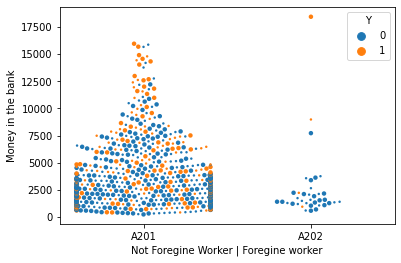

In [35]:
# Foregin workers often have more money in the bank.
ax = sns.swarmplot(data = dataFrame, x="X20", y="X05", sizes=(20,6), palette="tab10", hue=target)
ax.set(ylabel='Money in the bank', xlabel='Not Foregine Worker | Foregine worker')

[Text(0.5, 0, 'Age of the Customer'), Text(0, 0.5, 'Money in the bank')]

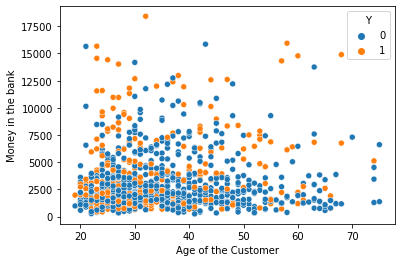

In [17]:
ax = sns.scatterplot(data = dataFrame, x="X13", y="X05", sizes=(20,6), palette="tab10", hue=target)
ax.set(xlabel='Age of the Customer', ylabel='Money in the bank')

[Text(0.5, 0, 'Age of the Customer'), Text(0, 0.5, 'Money in the Bank')]

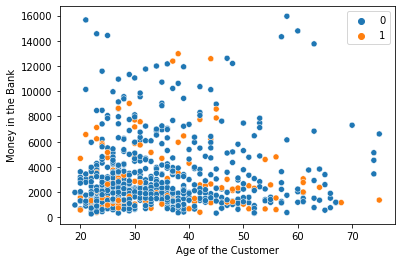

In [27]:
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    import seaborn as sns
    scaler = StandardScaler()
    
    scaled_features = scaler.fit_transform(X_train)

    kmeans = KMeans(n_clusters = 2, init = 'random', n_init = 10, max_iter = 300, tol= 1e-04, random_state = 0)
    kmeans.fit(X_train)

    ax = sns.scatterplot(data=features.iloc[:700], x="X13", y="X05", sizes=(20,6), hue=kmeans.labels_, palette="tab10")
    ax.set(xlabel='Age of the Customer', ylabel='Money in the Bank')

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Money in the Bank')]

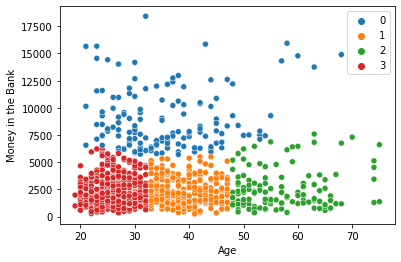

In [18]:
    scaled_separated = scaler.fit_transform(features[['X05', 'X13']])

    kmeans = KMeans(n_clusters = 4, init = 'random', n_init = 10, max_iter = 300, tol= 1e-04, random_state = 0)
    kmeans.fit(scaled_separated)

    ax = sns.scatterplot(data=features, x="X13", y="X05", sizes=(20,6), hue=kmeans.labels_, palette="tab10")
    ax.set(xlabel='Age', ylabel='Money in the Bank')

[Text(0, 0.5, 'Duration of the requested loan'),
 Text(0.5, 0, 'Money in the Bank')]

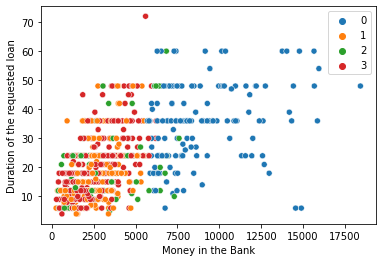

In [36]:
    scaled_separated = scaler.fit_transform(features[['X05', 'X13']])

    kmeans = KMeans(n_clusters = 4, init = 'random', n_init = 10, max_iter = 300, tol= 1e-04, random_state = 0)
    kmeans.fit(scaled_separated)

    ax = sns.scatterplot(data=features, y="X02", x="X05", sizes=(20,6), hue=kmeans.labels_, palette="tab10")
    ax.set(ylabel='Duration of the requested loan', xlabel='Money in the Bank')

<AxesSubplot:xlabel='X20', ylabel='X13'>

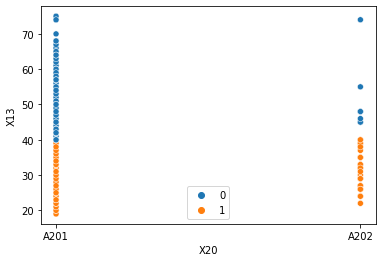

In [23]:
cluster_features = features[['X13', 'X20']]
cluster_features['X20'].replace({"A201" : 0, "A202" : 1}, inplace=True)
scaled_separated = scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters = 2, init = 'random', n_init = 10, max_iter = 300, tol= 1e-04, random_state = 0)
kmeans.fit(scaled_separated)

sns.scatterplot(data=features, y="X13", x="X20", sizes=(20,6), hue=kmeans.labels_, palette="tab10")


In [24]:

scaled_features = scaler.fit_transform(features[['X05', 'X13']])
not_scaled_features = features[['X05', 'X13']]

kmeans = KMeans(n_clusters = 4)
kmeans.fit(scaler.fit_transform(features[['X05', 'X13']]))
clusters_scaled = kmeans.labels_

kmeans.fit(not_scaled_features[['X05', 'X13']])
clusters_not_scaled = kmeans.labels_

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,6))
ax1.set_title("Not Scaled")
ax2.set_title("Scaled")

ax1.scatter(not_scaled_features["X13"], not_scaled_features["X05"], c=clusters_not_scaled, cmap="rainbow")
ax2.scatter(scaled_features["X13"], scaled_features["X05"], c=clusters_scaled, cmap="rainbow")

plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

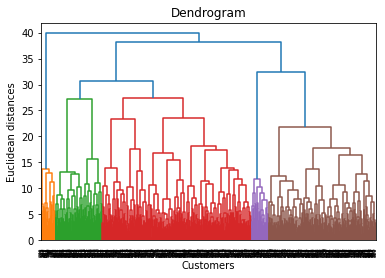

In [164]:
# using the dendrogram to find the optimal numbers of clusters.
import scipy.cluster.hierarchy as sch
# lets create a dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [146]:
from fpgrowth_py import fpgrowth

categorical_data = dataFrame[["X01", "X03", "X04", "X06", "X07", "X09", "X10", "X12", "X14", "X15", "X17", "X19", "X20", "Y"]]

itemSetList = categorical_data.to_numpy()
freqItemSet, rules = fpgrowth(itemSetList, minSupRatio=0.5, minConf=0.5)
with open("outfile.txt", "w") as outfile:
    for line in rules:
        outfile.write("".join(str(line) + "\n"))

In [27]:
from __future__ import print_function

import matplotlib as mpl
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
value = ['X13']

dfX = pd.DataFrame(features[value])
col = dfX[value].values.reshape(-1, 1)

scalers = [
    ('standard scaling', StandardScaler()),
    ('min-max scaling', MinMaxScaler()),
    ('max-abs scaling', MaxAbsScaler()),
    ('robust scaling', RobustScaler(quantile_range=(25, 75))),
]

for scaler in scalers:
    dfX[scaler[0]] = scaler[1].fit_transform(col)
    
dfX.head()




,X13,standard scaling,min-max scaling,max-abs scaling,robust scaling
0,67,2.766456,0.857143,0.893333,2.266667
1,22,-1.191404,0.053571,0.293333,-0.733333
2,49,1.183312,0.535714,0.653333,1.066667
3,45,0.831502,0.464286,0.600000,0.800000
4,53,1.535122,0.607143,0.706667,1.333333


## Resources:
- http://www.tryanalyticsblog.com/svm-classification-credit/
- https://towardsdatascience.com/k-means-clustering-of-university-data-9e8491068778
- K Nearest Neighbors Project from Practice classes
- https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/
- https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/